In [87]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [88]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [90]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [92]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [93]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [94]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [95]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])



id
station
date
prcp
tobs


In [96]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

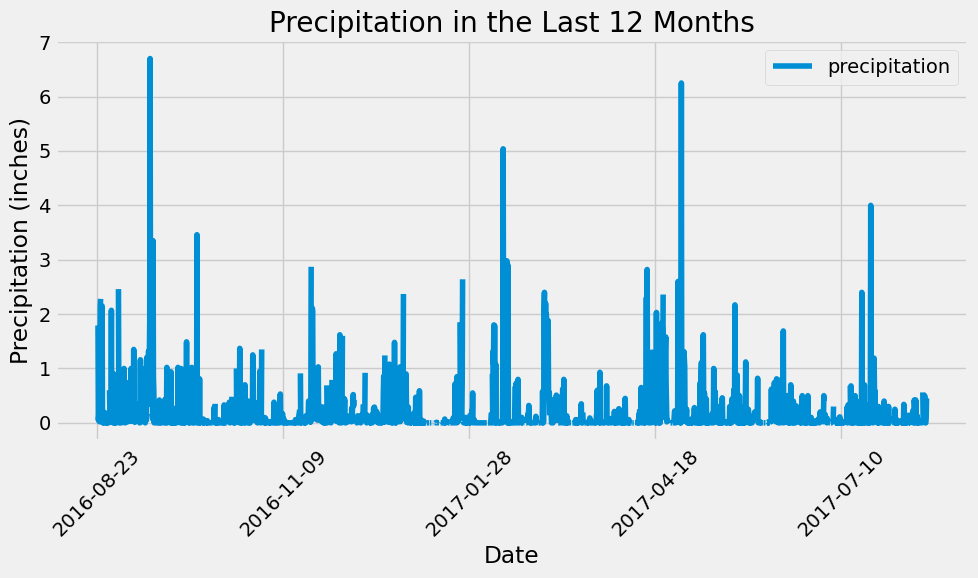

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

precip_df = precip_df.sort_values('date')

precip_df.plot(x='date', y='precipitation', figsize=(10,6), rot=45)
plt.title('Precipitation in the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.tight_layout()
plt.show()


In [98]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [99]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'])

id
station
name
latitude
longitude
elevation


In [101]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [113]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in most_active:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the station ID from the most active stations list
station_data = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active = session.query(*station_data).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active


(54.0, 85.0, 71.66378066378067)

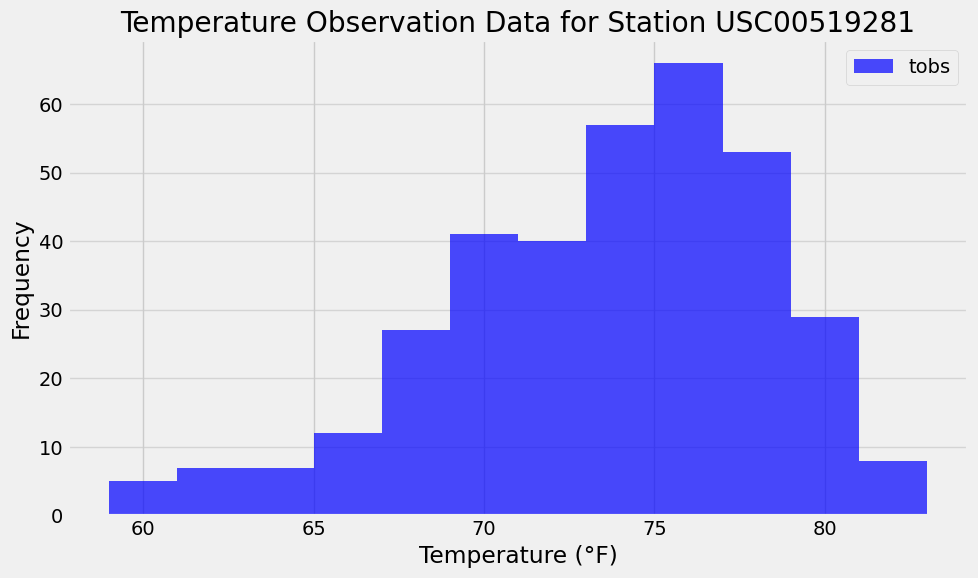

In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station_id,Measurement.date >= one_year_ago).all()
temp_df = pd.DataFrame(temp_data, columns=['temperature'])
plt.figure(figsize=(10, 6))
plt.hist(temp_df['temperature'], bins=12, alpha=0.7, color='blue', label='tobs')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()  # Add legend here
plt.tight_layout()
plt.show()


# Close Session

In [105]:
# Close Session
session.close()